<a href="https://colab.research.google.com/github/Vise-1/Eye_Disease_Classification_via_ML/blob/main/Model_Eye_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Import and Setup

In [ ]:
# Importing Dependencies.
import requests
import zipfile
from pathlib import Path
from tqdm.auto import tqdm
import shutil
import os

import torch
from torch import nn

# Device agnostics.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
url = "https://github.com/PerceptiLabs/ocular-disease/archive/refs/heads/main.zip"

# Creating directory and Downloading data
data_path = Path("data/")
img_path = data_path / "Dataset_Eye_Disease"

if img_path.is_dir():
  print(f"{img_path} directory already exists..... SKIPPING DOWNLOAD")
else:
  print(f"{img_path} does not exists, creating one...")
  img_path.mkdir(parents=True, exist_ok=True)

# Download dataset from github (same as kaggle but calling the API was a hassle so opted for this PS: Much easier this way, trust me)
  with open(data_path / "ocular-disease-main.zip", "wb") as f:
    request = requests.get(url)
    print("Downloading Eye Disease Dataset...")
    f.write(request.content)

# Unzipping data to created folder
with zipfile.ZipFile(data_path / "ocular-disease-main.zip", "r") as zip_ref:
  print(f"Unzipping Eye Disease Dataset...")
  zip_ref.extractall(img_path)

data/Dataset_Eye_Disease directory already exists..... SKIPPING DOWNLOAD
Unzipping Eye Disease Dataset...


In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(img_path)

train_dir = img_path / "ocular-disease-main" / "data"

There are 1 directories and 0 images in 'data/Dataset_Eye_Disease'.
There are 1 directories and 3 images in 'data/Dataset_Eye_Disease/ocular-disease-main'.
There are 1 directories and 1 images in 'data/Dataset_Eye_Disease/ocular-disease-main/data'.
There are 0 directories and 6392 images in 'data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images'.


In [ ]:
print(img_path)

data/Dataset_Eye_Disease


In [ ]:
# reading csv of labels
import pandas as pd

csv_path = Path("csv/")
if csv_path.is_dir():
  print("csv directory already exists, skippind downlaod...")
else:
  print(f"csv directory doesn't exists, downloading...")
  csv_path.mkdir(parents=True, exist_ok=True)


url_csv = "https://raw.githubusercontent.com/Vise-1/Eye_Disease_Classification_via_ML/main/full_df.csv"
with open(csv_path / "labels.csv", "wb") as f:
  request = requests.get(url_csv)
  print("Downloading labels.csv")
  f.write(request.content)

csv_data = pd.read_csv("csv/labels.csv")
csv_data.head()



csv directory already exists, skippind downlaod...


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
# Visualizing image
import random
from PIL import Image

# Sorting path list in numerial then lexical format
image_path_list = list(img_path.glob("*/*/*/*.jpg"))
image_path_list = sorted(image_path_list, key=lambda i: int(os.path.split(i)[1].split("_")[0]))
image_path_list = sorted(image_path_list, key=lambda i: (os.path.split(i)[1].split("_")[1]))

for i in range(10):
  print(image_path_list[i])

data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/0_left.jpg
data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/1_left.jpg
data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/3_left.jpg
data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/4_left.jpg
data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/5_left.jpg
data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/6_left.jpg
data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/7_left.jpg
data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/8_left.jpg
data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/9_left.jpg
data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/10_left.jpg


Image Height: 512 | Image Width: 512
2982 left.jpg
mild nonproliferative retinopathy


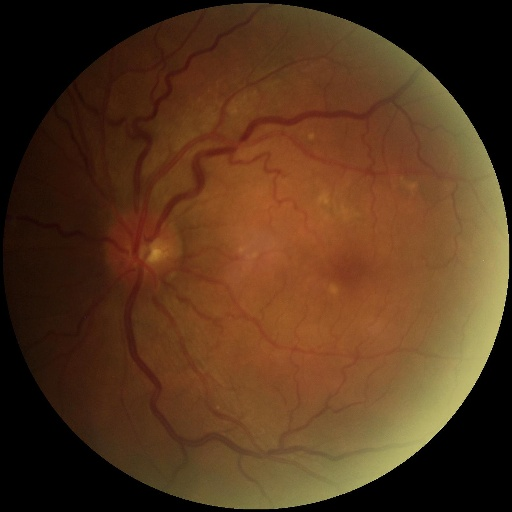

In [ ]:
rand_img_path = random.choice(image_path_list)
img = Image.open(rand_img_path)

print(f"Image Height: {img.height} | Image Width: {img.width}")

eye_num = os.path.split(rand_img_path)[1].split("_")[0]
eye_side = os.path.split(rand_img_path)[1].split("_")[1]

rand_choice_num = int(os.path.split(rand_img_path)[1].split("_")[0])

left_eye_status = csv_data.values[rand_choice_num][5]
right_eye_status = csv_data.values[rand_choice_num][6]

print(eye_num, eye_side)

eye_status = None
if str(eye_side) == 'right.jpg':
  print(right_eye_status)
  eye_status = right_eye_status

elif str(eye_side) == 'left.jpg':
  print(left_eye_status)
  eye_status = left_eye_status
else:
  print("An Unexpected error occured while splitting file name, can't store left/right value")


img

(-0.5, 511.5, 511.5, -0.5)

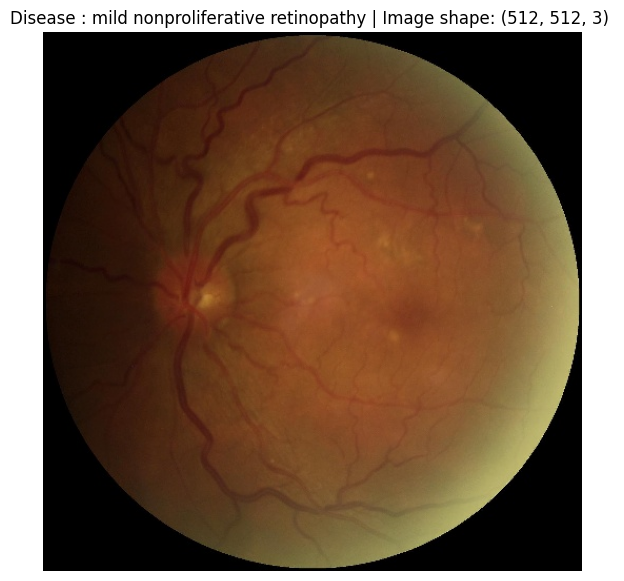

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

array_img = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(array_img)
plt.title(f"Disease : {eye_status} | Image shape: {array_img.shape} ")
plt.axis(False)

## Data Transform

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

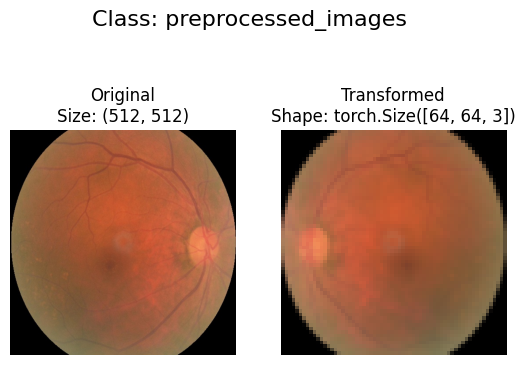

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Selects random iamges from a path of images and loads/transforms them then
  plots the original vs the transformed versions.
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=1)

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_transform,
                                  target_transform=None)

train_data, len(train_data)

(Dataset ImageFolder
     Number of datapoints: 6392
     Root location: data/Dataset_Eye_Disease/ocular-disease-main/data
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 6392)

In [107]:
train_data.samples[0]

('data/Dataset_Eye_Disease/ocular-disease-main/data/preprocessed_images/0_left.jpg',
 0)

In [114]:
img, label = train_data[500][0], train_data [0][1]
print(f"Image tensor:\n {img} \nImage Shape: {img.shape} \nImage Datatype: {img.dtype} \nImage label:{label} \nLabel datatype: {type(label)}")

Image tensor:
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]) 
Image Shape: torch.Size([3, 64, 64]) 
Image Datatype: torch.float32 
Image label:0 
Label datatype: <class 'int'>


Original Shape: torch.Size([3, 64, 64]) -> [Color_channels, Height, Width]
Image Permute: torch.Size([64, 64, 3]) -> [Height, Width, Color_channels]


Text(0.5, 1.0, 'preprocessed_images')

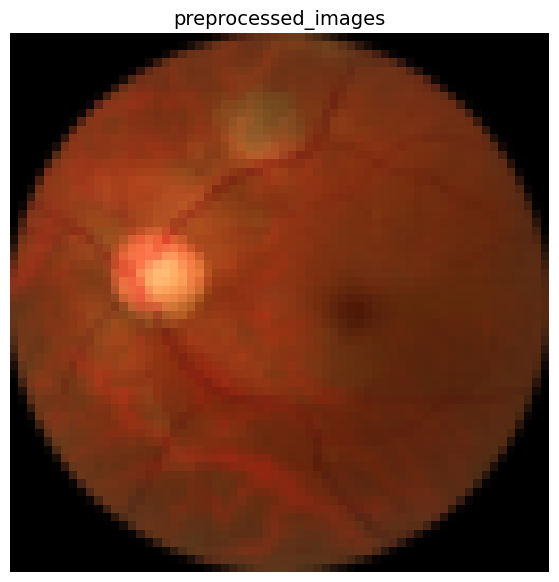

In [115]:
img_permute = img.permute(1,2,0)

print(f"Original Shape: {img.shape} -> [Color_channels, Height, Width]")
print(f"Image Permute: {img_permute.shape} -> [Height, Width, Color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [117]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

train_dataloader

In [119]:
len(train_dataloader)

200